In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [65]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [66]:
df.shape

(2416, 7)

In [67]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

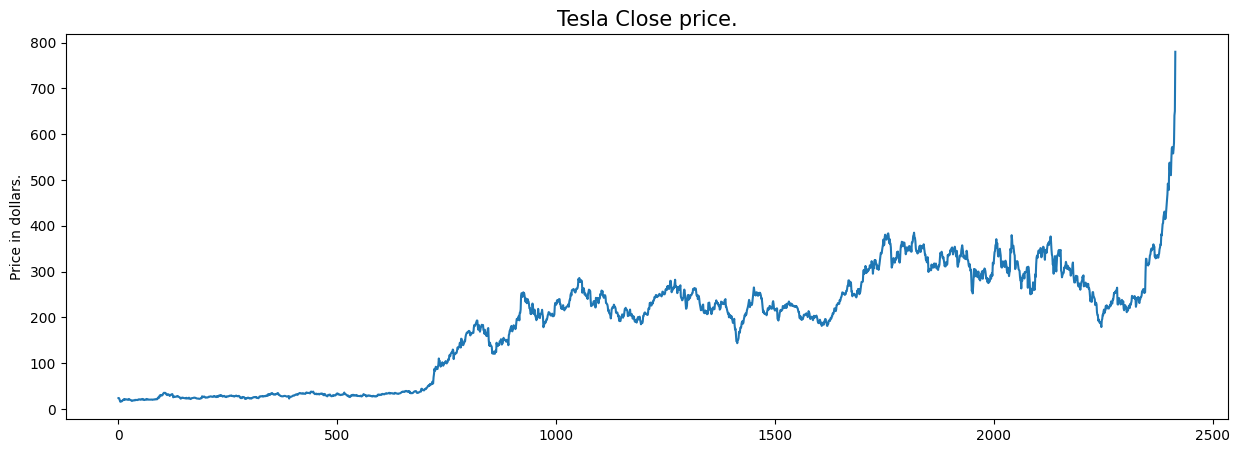

In [69]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [70]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [71]:
df = df.drop(['Adj Close'], axis=1)

Before moving further let’s check for the null values if any are present in the data frame.

In [72]:

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<ipython-input-73-da7472e42680>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-73-da7472e42680>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-73-da7472e42680>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new

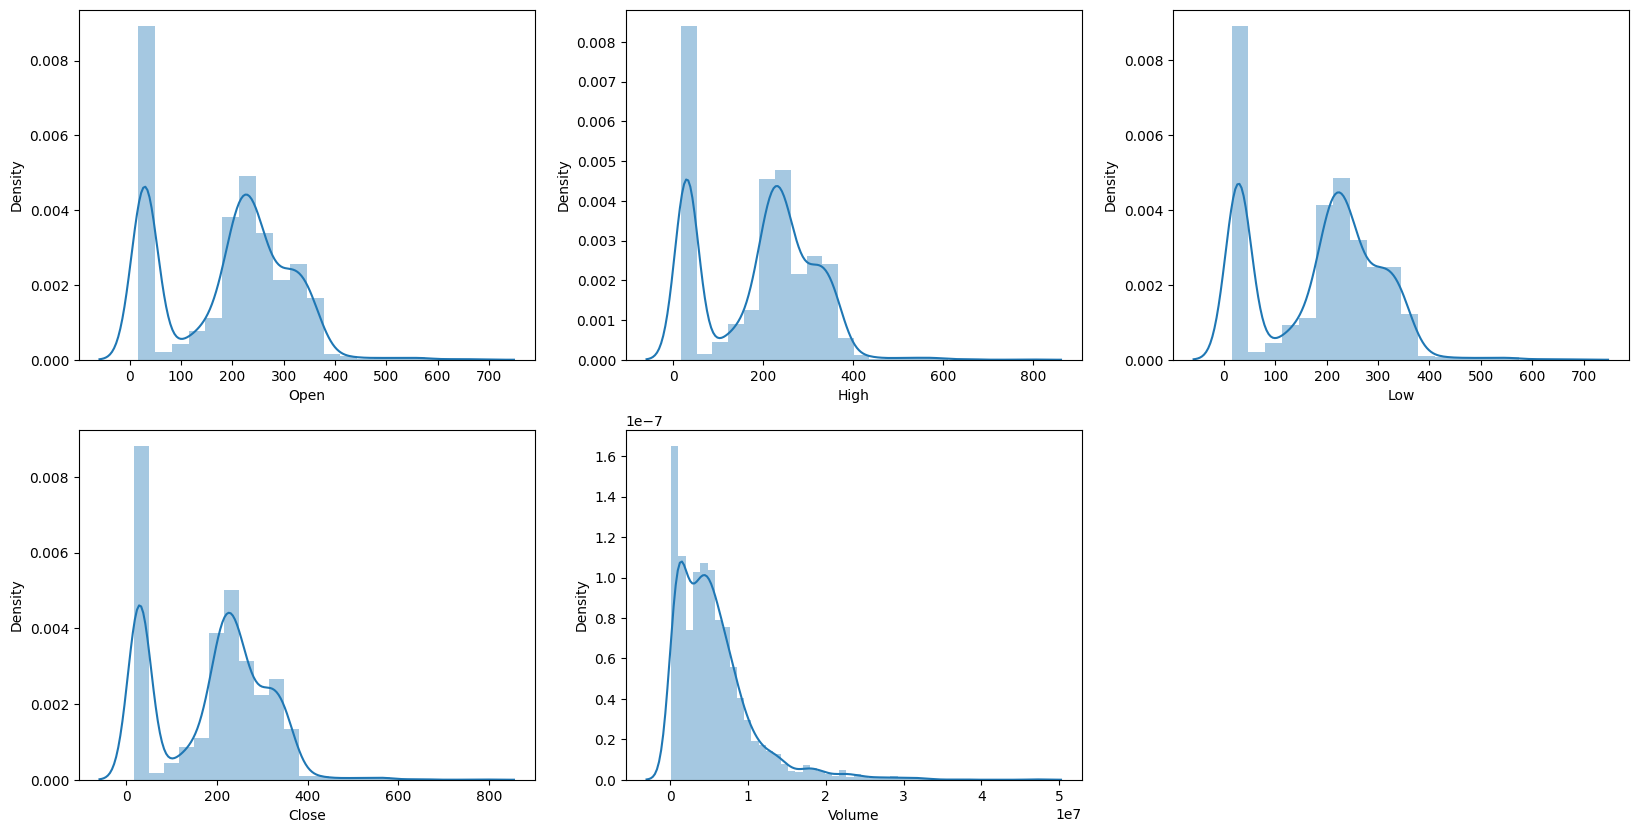

In [73]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

<ipython-input-74-25cecc36263e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


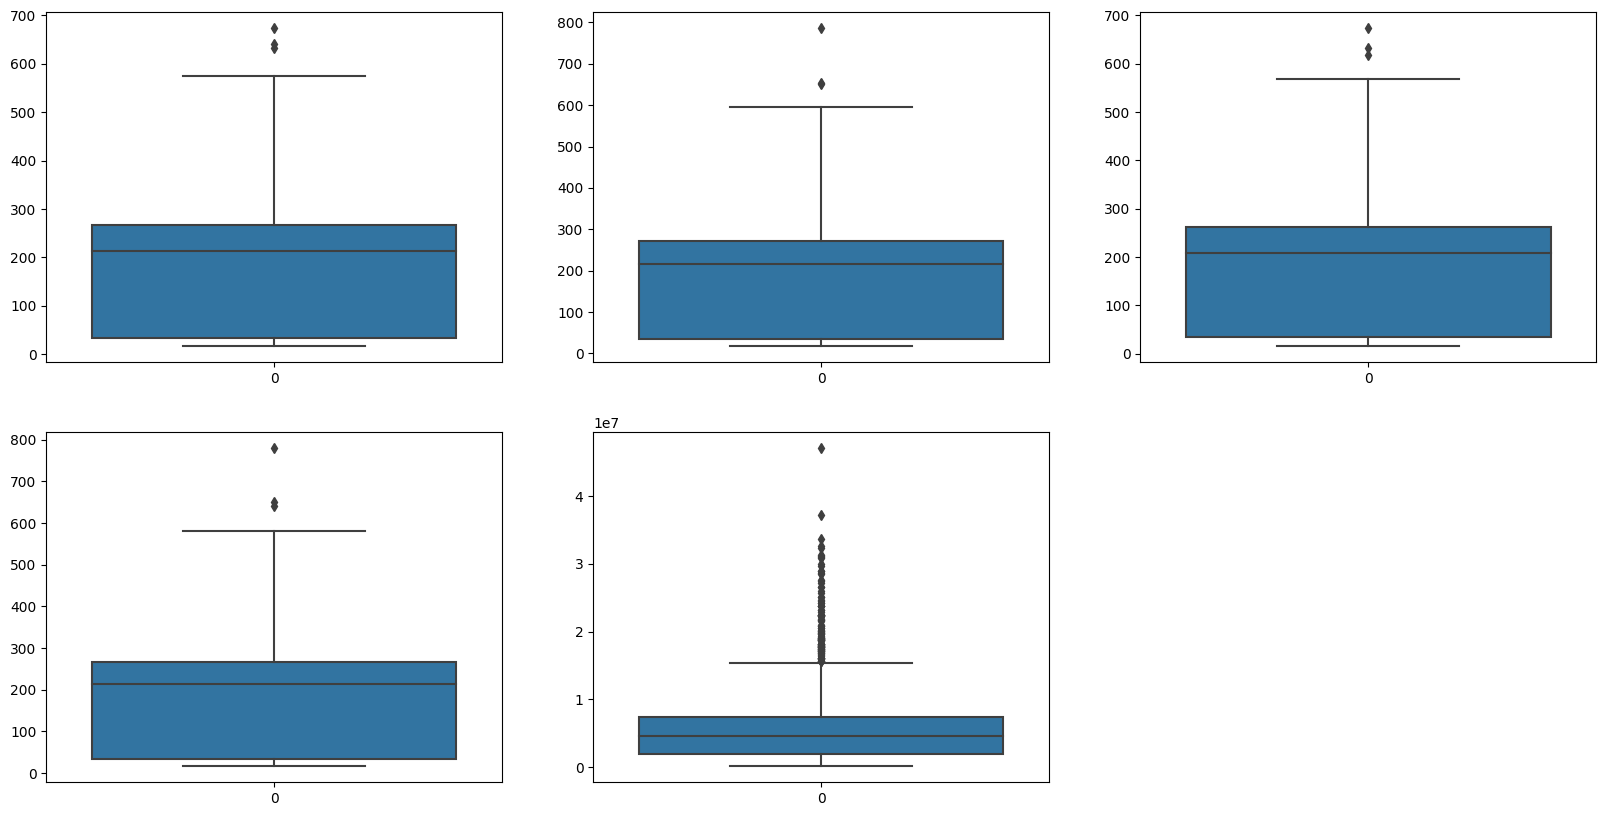

In [74]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

Feature Engineering
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [75]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()




,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [76]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

<ipython-input-77-730fcd7df88c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-77-730fcd7df88c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


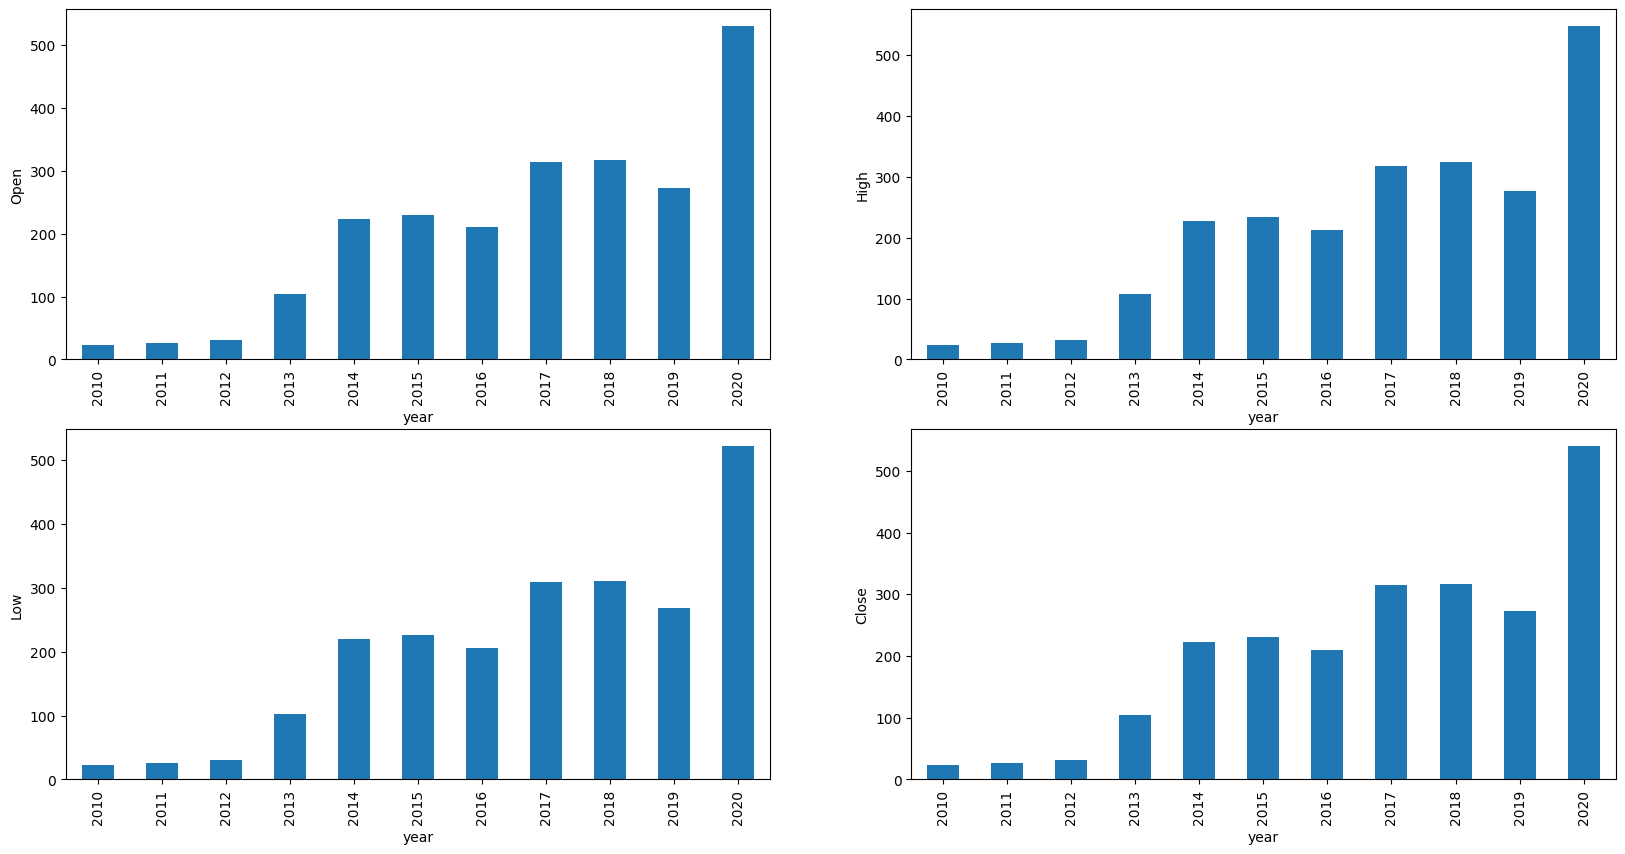

In [77]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.ylabel(col)
plt.show()

from bar graph we conclude that stock price is double in 2013 to 2014

In [78]:

df.groupby('is_quarter_end').mean()

<ipython-input-78-8b310a02a10a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [79]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


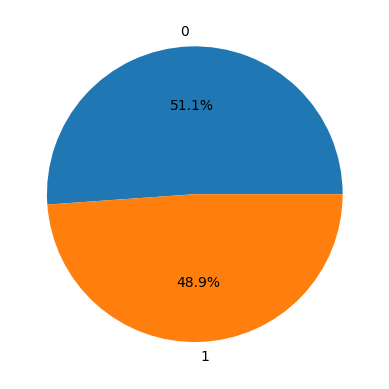

In [80]:

plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

<ipython-input-81-fbba8d4d60f6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)


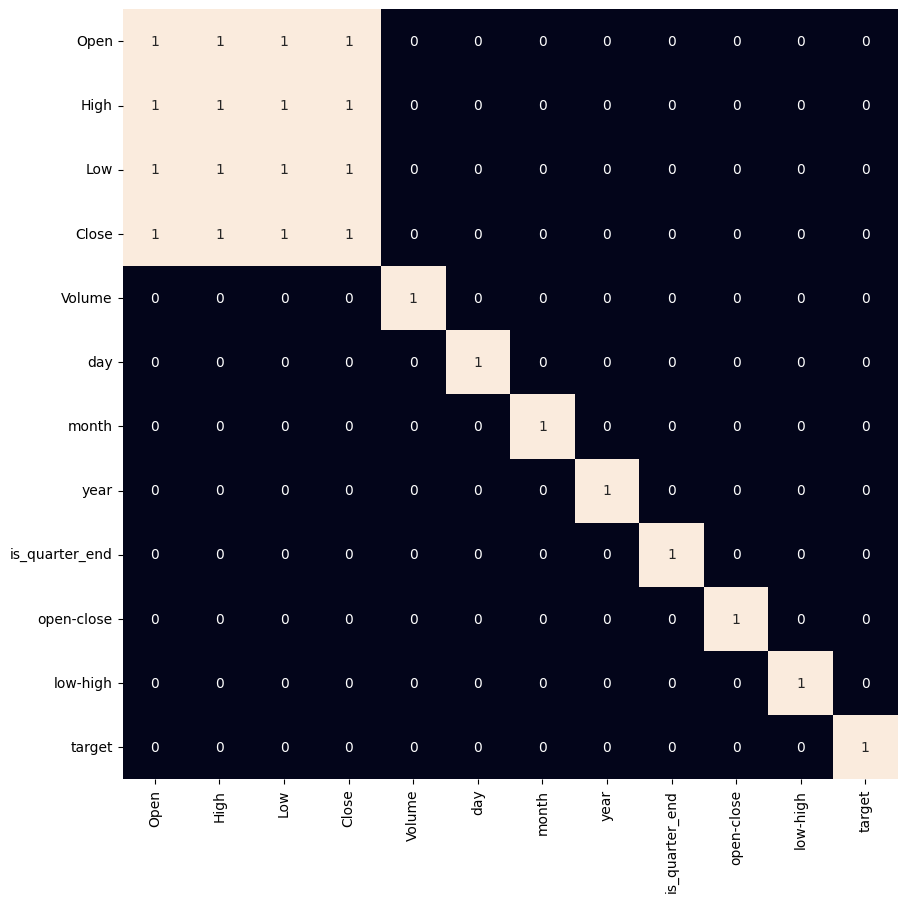

In [81]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [82]:

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [83]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.46257525998905313

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

In [84]:
df1=df.reset_index()['Close']

In [85]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [87]:
print(df1)

[[0.01058623]
 [0.01050772]
 [0.00806072]
 ...
 [0.81786181]
 [0.83063335]
 [1.        ]]


In [88]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [89]:
training_size,test_size

(1570, 846)

In [90]:
train_data

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.24933263],
       [0.24710809],
       [0.24786705]])

In [91]:
test_data

array([[0.2494504 ],
       [0.25078513],
       [0.25280032],
       [0.2486391 ],
       [0.24924104],
       [0.24195236],
       [0.24630987],
       [0.25896362],
       [0.25596703],
       [0.25210679],
       [0.24234494],
       [0.23660037],
       [0.2422795 ],
       [0.24116724],
       [0.24301229],
       [0.24135044],
       [0.2364695 ],
       [0.2331327 ],
       [0.23985868],
       [0.24569484],
       [0.23985868],
       [0.24115414],
       [0.24464799],
       [0.2440984 ],
       [0.24396755],
       [0.24628369],
       [0.24099712],
       [0.23806595],
       [0.22898455],
       [0.22535986],
       [0.22457472],
       [0.22868359],
       [0.23215128],
       [0.23441508],
       [0.22802931],
       [0.22186601],
       [0.22606647],
       [0.21676262],
       [0.21979849],
       [0.22000784],
       [0.22619734],
       [0.22143418],
       [0.22077991],
       [0.22948181],
       [0.23205967],
       [0.2366527 ],
       [0.23595917],
       [0.227

In [92]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [93]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [94]:
print(X_train.shape), print(y_train.shape)

(1469, 100)
(1469,)


(None, None)

In [95]:
print(X_test.shape), print(ytest.shape)

(745, 100)
(745,)


(None, None)

In [96]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [97]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 8s 66ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 2/100
23/23 [==============================] - 0s 16ms/step - loss: 5.4943e-04 - val_loss: 0.0018
Epoch 3/100
23/23 [==============================] - 0s 18ms/step - loss: 3.2866e-04 - val_loss: 0.0017
Epoch 4/100
23/23 [==============================] - 0s 17ms/step - loss: 3.1967e-04 - val_loss: 0.0022
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 3.0429e-04 - val_loss: 0.0019
Epoch 6/100
23/23 [==============================] - 0s 21ms/step - loss: 2.6227e-04 - val_loss: 0.0016
Epoch 7/100
23/23 [==============================] - 1s 24ms/step - loss: 2.5189e-04 - val_loss: 0.0019
Epoch 8/100
23/23 [==============================] - 1s 24ms/step - loss: 2.4288e-04 - val_loss: 0.0017
Epoch 9/100
23/23 [==============================] - 1s 24ms/step - loss: 2.2289e-04 - val_loss: 0.0022
Epoch 10/100
23/23 [==============================] - 0s 20ms/step -

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 0s 5ms/step


In [102]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.35829739588988

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

318.6339904493625

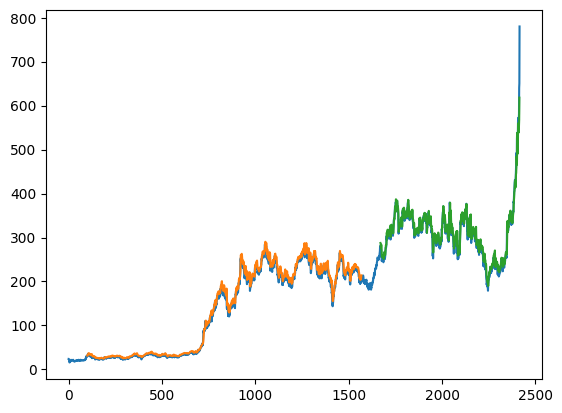

In [105]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [106]:
len(test_data)

846

In [114]:
x_input=test_data[746:].reshape(1,-1)
x_input

array([[0.30266947, 0.30105993, 0.30018319, 0.29705574, 0.29964668,
        0.29794557, 0.30201519, 0.29419   , 0.29498822, 0.27140802,
        0.27859199, 0.2967286 , 0.29616593, 0.29451714, 0.29951584,
        0.29747449, 0.28425805, 0.28216435, 0.29039519, 0.29344413,
        0.29930646, 0.29958127, 0.30370322, 0.31557183, 0.31678882,
        0.31922272, 0.32212772, 0.31555877, 0.31104423, 0.31376603,
        0.31258832, 0.37147343, 0.40870192, 0.4081523 , 0.39311699,
        0.39153364, 0.39141588, 0.38930908, 0.39475268, 0.39442554,
        0.40667363, 0.41839834, 0.42049204, 0.43089505, 0.43722847,
        0.43222976, 0.43646952, 0.44015966, 0.43730697, 0.44977753,
        0.44022507, 0.44364039, 0.41512694, 0.41944517, 0.40973569,
        0.41283697, 0.4110704 , 0.41752158, 0.41926199, 0.41511384,
        0.41163307, 0.41885634, 0.42361947, 0.43580214, 0.4408532 ,
        0.44998691, 0.44829889, 0.47853965, 0.47525516, 0.49378434,
        0.50803456, 0.51006281, 0.52789846, 0.53

In [117]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [109]:
temp_input

[0.3522114511907877,
 0.37060977361947134,
 0.369706866003664,
 0.37071448050248623,
 0.37147342711332115,
 0.3731876341271918,
 0.3844281431562418,
 0.3817325163569746,
 0.3257916631771787,
 0.3858937607956032,
 0.3732268895577074,
 0.36508765768123524,
 0.34811565951321644,
 0.32210155980109917,
 0.3071970662130332,
 0.3232138026694582,
 0.31546716173776496,
 0.3093823554043444,
 0.31795341402774135,
 0.3190133420570531,
 0.34125882753205966,
 0.3349646676262758,
 0.3246663229521068,
 0.3195498560586234,
 0.3207930018319812,
 0.36422404475268255,
 0.3568437581784873,
 0.39133732661606907,
 0.41232660821774403,
 0.4174954278984559,
 0.411018050248626,
 0.42072756739073536,
 0.4298351203873331,
 0.4326223554043444,
 0.4260664668934833,
 0.42562156241821514,
 0.434912331850301,
 0.43915204658466367,
 0.43798745092907615,
 0.4128238667887987,
 0.4225726393614237,
 0.42946872546453807,
 0.43527872546453805,
 0.44295995550902906,
 0.44186077074064384,
 0.4340355796911803,
 0.42186600628107

In [118]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9325871]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.68322426 0.65781209 

In [119]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [120]:
import matplotlib.pyplot as plt

In [121]:
len(df1)

2416

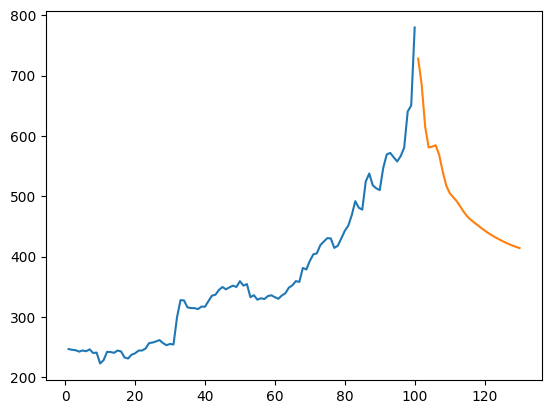

In [122]:
plt.plot(day_new,scaler.inverse_transform(df1[2316:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

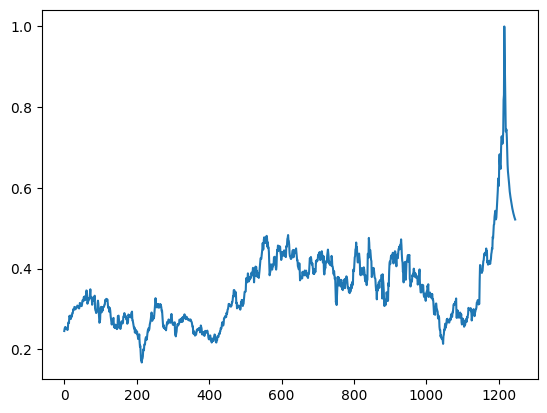

In [123]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [125]:
df3=scaler.inverse_transform(df3).tolist()

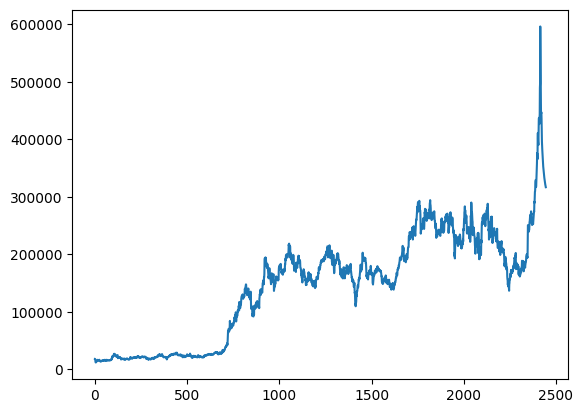

In [126]:
plt.plot(df3)